# Adaptation Strategies Analysis

In [1]:
#Importing Necessary Packages

import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pystout import pystout
from tabulate import tabulate
import latextable

In [2]:
def confint(data):
    ci = 1.96 * np.std(data) / np.sqrt(len(data)-1)
    return ci

In [3]:
1.96 * 0.75 / np.sqrt(99)

0.14774055884310416

In [4]:
1.96 * 0.48 / np.sqrt(99)

0.09455395765958667

In [7]:
(407 - 453) / 453

-0.10154525386313466

In [3]:
raw_questionnaire = pd.read_csv('ClimateChangeData.csv')

raw_questionnaire


,HHID,Resp1_Name,Resp1_Age,Resp1_Gen,Resp2_Name,Resp2_Age,Resp2_Gen,Resp3_Name,Resp3_Age,Resp3_Gen,...,I_2,I_3,I_3_97,I_4,I_4_97,I_5,I_5_97,I_6,I_7,I_8
0,2301006,PII,43,0,0,-1,-1,0,-1,-1,...,3,2,0,1,0,3,0,1,2,2
1,2301007,PII,55,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
2,2301013,PII,49,1,0,-1,-1,0,-1,-1,...,1,7,0,1,0,3,0,2,2,2
3,2301016,PII,55,1,0,-1,-1,0,-1,-1,...,2,2,0,1,0,3,0,2,2,3
4,2301017,PII,47,1,0,-1,-1,0,-1,-1,...,1,2,0,1,0,3,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,PII,47,0,PII,44,1,PII,18,1,...,1,1,0,1,0,3,0,2,2,2
496,2611115,PII,36,1,PII,37,0,0,-1,-1,...,1,2,0,1,0,3,0,2,3,3
497,2611117,PII,44,1,0,-1,-1,0,-1,-1,...,2,5,0,1,0,3,0,2,2,2
498,2611118,PII,56,1,0,-1,-1,0,-1,-1,...,1,1,0,1,0,3,0,2,3,2


In [4]:
#Reading in adaptation strategy columns
adaptation = pd.DataFrame()
adaptation['HHID'] = raw_questionnaire['HHID']

for item in raw_questionnaire.columns:
    if 'C1' in item:
        adaptation[item] = raw_questionnaire[item]

adaptation.drop(['C1_0', 'C1_97','C1_98', 'C1_99'], inplace=True, axis=1)

adaptation

,HHID,C1_01,C1_1,C1_2,C1_3,C1_4,C1_5,C1_6,C1_7,C1_8,C1_9,C1_10,C1_11,C1_12,C1_13,C1_97_1
0,2301006,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
1,2301007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
2,2301013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1
3,2301016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
4,2301017,0,0,0,1,0,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1
496,2611115,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1
497,2611117,0,1,0,1,0,0,1,0,0,0,0,0,0,0,-1
498,2611118,0,1,0,1,0,0,0,0,0,0,0,0,0,0,-1


In [5]:
#Creating additional strategy columns from 'Others' columns (see calendar)
adaptation['PestControl'] = 0
adaptation['WaterManagement'] = 0

adaptation['PestControl'] = np.where(adaptation['C1_97_1'] == 15, 1, 0)
adaptation['WaterManagement'] = np.where((adaptation['C1_97_1'] > 15) & (adaptation['C1_97_1'] < 18), 1, 0)

adaptstrategies = ['Nothing', 'DifferentSeed', 'DifferentCrop', 'DelayedPlanting', 'FewerCrops', 'BiggerLoan', 'BorrowMoney', 'Remittances', 'SoldLivestock', 'PurchasedLivestock', 'SwitchedSchool', 'DroppedSchool', 'DiversifyLivelihood', 'Migration']

dict1 = {}
for key, value in zip(adaptation.columns[1:-2], adaptstrategies):
    dict1[key] = value

adaptation.rename(columns=dict1, inplace=True)

adaptation.drop(['C1_97_1', 'Nothing', 'DroppedSchool'], inplace=True, axis=1)
adaptation



,HHID,DifferentSeed,DifferentCrop,DelayedPlanting,FewerCrops,BiggerLoan,BorrowMoney,Remittances,SoldLivestock,PurchasedLivestock,SwitchedSchool,DiversifyLivelihood,Migration,PestControl,WaterManagement
0,2301006,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2301007,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2301013,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2301016,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2301017,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,0,1,0,0,0,0,0,0,0,0,0,0,0
496,2611115,0,0,0,0,0,0,0,0,0,0,1,0,0,0
497,2611117,1,0,1,0,0,1,0,0,0,0,0,0,0,0
498,2611118,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#Adding Adaptation Categories
farm_strategies = ['DifferentSeed', 'DifferentCrop', 'DelayedPlanting', 'PestControl', 'WaterManagement']
financial_strategies = ['BiggerLoan', 'BorrowMoney', 'Remittances']
livelihood_strategies = ['FewerCrops', 'SoldLivestock', 'PurchasedLivestock', 'SwitchedSchool', 'DiversifyLivelihood', 'Migration']

adaptation['FarmStrategies'] = 0
adaptation['FinancialStrategies'] = 0
adaptation['LivelihoodStrategies'] = 0

for i, row in adaptation.iterrows():
    for item in farm_strategies:
        if adaptation[item][i] == 1:
            adaptation['FarmStrategies'][i] = 1
    for item in financial_strategies:
        if adaptation[item][i] == 1:
            adaptation['FinancialStrategies'][i] = 1
    for item in livelihood_strategies:
        if adaptation[item][i] == 1:
            adaptation['LivelihoodStrategies'][i] = 1
            
adaptation.to_csv('AdaptationStrategies.csv')
adaptation



,HHID,DifferentSeed,DifferentCrop,DelayedPlanting,FewerCrops,BiggerLoan,BorrowMoney,Remittances,SoldLivestock,PurchasedLivestock,SwitchedSchool,DiversifyLivelihood,Migration,PestControl,WaterManagement,FarmStrategies,FinancialStrategies,LivelihoodStrategies
0,2301006,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2301007,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,2301013,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2301016,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,2301017,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2611114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
496,2611115,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
497,2611117,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
498,2611118,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


dict_values([0.498, 0.246, 0.2, 0.172, 0.098, 0.092, 0.038, 0.032, 0.032, 0.026, 0.02, 0.018, 0.01, 0.01])


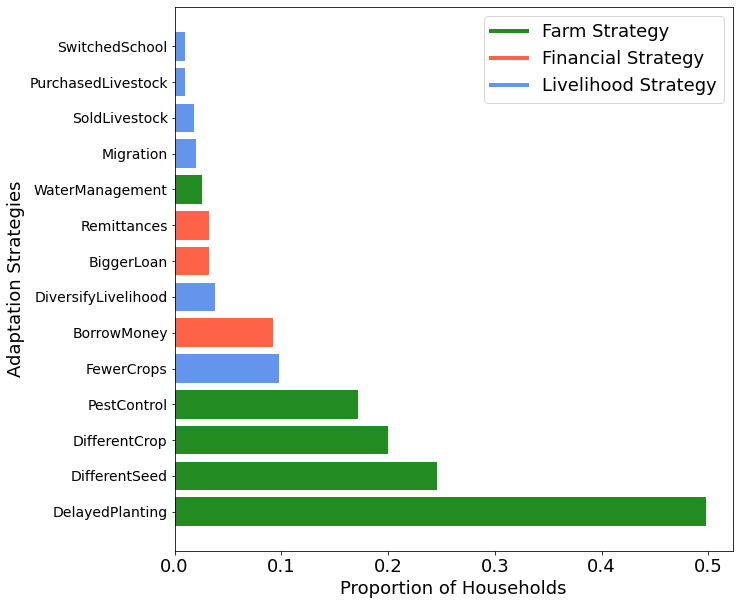

In [7]:
#Creating bar chart of adaptation strategy adoption

column_names = adaptation.columns[1:-3]
strategylength = len(column_names)
x = {key: 0 for key in column_names}
ypos = np.arange(strategylength)

#Defining strategy buckets
labels = {key : [] for key in column_names}
colors = {key : [] for key in column_names}

for col in column_names:
    x[col] = np.count_nonzero(adaptation[col]) / len(adaptation)

#Sort strategies by frequency
x_sort = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
for k in x_sort:
    if ('Planting' in k) or ('Different' in k) or ('Control' in k) or ('Management' in k):
        labels[k] = 'Farm Strategy'
        colors[k] = 'forestgreen'
    elif ('Borrow' in k) or ('Loan' in k) or ('Remittance' in k):
        labels[k] = 'Financial Strategy'
        colors[k] = 'tomato'
    elif ('Fewer' in k) or ('Diversify' in k) or ('Migration' in k) or ('Livestock' in k) or ('School' in k):
        labels[k] = 'Livelihood Strategy'
        colors[k] = 'cornflowerblue'
colors_keys = sorted(colors, key=lambda k: x_sort[k], reverse=True)

colors_sorted = {}
labels_sorted = {}
for k in colors_keys:
    colors_sorted[k] = colors[k]

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='forestgreen', lw=4),
                Line2D([0], [0], color='tomato', lw=4),
                Line2D([0], [0], color='cornflowerblue', lw=4)]

print(x_sort.values())
f, ax1 = plt.subplots(figsize=[10,10])
ax1.barh(ypos, x_sort.values(), color = colors_sorted.values(), label=labels_sorted.values())
ax1.set_yticks(ypos, x_sort.keys())
ax1.set_xlabel('Proportion of Households', fontsize=18)
ax1.set_ylabel('Adaptation Strategies', fontsize=18)

plt.yticks(size=14)
plt.xticks(size=18)
plt.legend(custom_lines, ['Farm Strategy', 'Financial Strategy', 'Livelihood Strategy'], fontsize=18)
plt.show()

#plt.savefig('AdaptationStrategyPyramid.png', bbox_inches='tight')